In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install imagecodecs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 41.5 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import numpy as np


In [ ]:
data_num = {}
for i in os.listdir("/content/drive/MyDrive/New Dataset"):
  try:
    c = len(os.listdir(os.path.join("/content/drive/MyDrive/New Dataset",i)))
    print(i+": "+str(c))
    data_num[i] = c
  except:
    pass

Extra Teeth: 1214
Dental Caries: 1596
Bone Lost: 1788


Augmentation

In [ ]:
# def flip_image(image,dir):
#     image = cv2.flip(image, dir)
#     cv2.imwrite(Folder_name + "/flip-" + str(dir)+Extension, image)
# folder_path = "/content/drive/MyDrive/New Dataset/Bone Lost"
# for img in os.listdir(folder_path):
#     simg_path = os.path.join(folder_path,img)
#     print(simg_path)


#     image_file=simg_path
#     Folder_name=folder_path
#     Extension=image_file.split("/")[-1]
#     image=cv2.imread(image_file)

#     flip_image(image,-1)#both

In [ ]:
# def flip_image(image,dir):
#     image = cv2.flip(image, dir)
#     cv2.imwrite(Folder_name + "/flip-" + str(dir)+Extension, image)
# folder_path = "/content/drive/MyDrive/New Dataset/Dental Caries"
# for img in os.listdir(folder_path):
#     simg_path = os.path.join(folder_path,img)
#     print(simg_path)


#     image_file=simg_path
#     Folder_name=folder_path
#     Extension=image_file.split("/")[-1]
#     image=cv2.imread(image_file)

#     flip_image(image,-1)#both

In [ ]:
# def flip_image(image,dir):
#     image = cv2.flip(image, dir)
#     cv2.imwrite(Folder_name + "/flip-" + str(dir)+Extension, image)
# folder_path = "/content/drive/MyDrive/New Dataset/Extra Teeth"
# for img in os.listdir(folder_path):
#     simg_path = os.path.join(folder_path,img)
#     print(simg_path)

# #
#     image_file=simg_path
#     Folder_name=folder_path
#     Extension=image_file.split("/")[-1]
#     image=cv2.imread(image_file)

#     flip_image(image,-1)#both

In [ ]:
# def flip_image(image,dir):
#     image = cv2.flip(image, dir)
#     cv2.imwrite(Folder_name + "/flip-" + str(dir)+Extension, image)
# folder_path = "/content/drive/MyDrive/input/DISEASE/Extra Teeth"
# for img in os.listdir(folder_path):
#     simg_path = os.path.join(folder_path,img)
#     print(simg_path)


#     image_file=simg_path
#     Folder_name=folder_path
#     Extension=image_file.split("/")[-1]
#     image=cv2.imread(image_file)

#     flip_image(image,-1)#both

In [ ]:
# data_num = {}
# for i in os.listdir("/content/drive/MyDrive/input/DISEASE"):
#   try:
#     c = len(os.listdir(os.path.join("/content/drive/MyDrive/input/DISEASE",i)))
#     print(i+": "+str(c))
#     data_num[i] = c
#   except:
#     pass

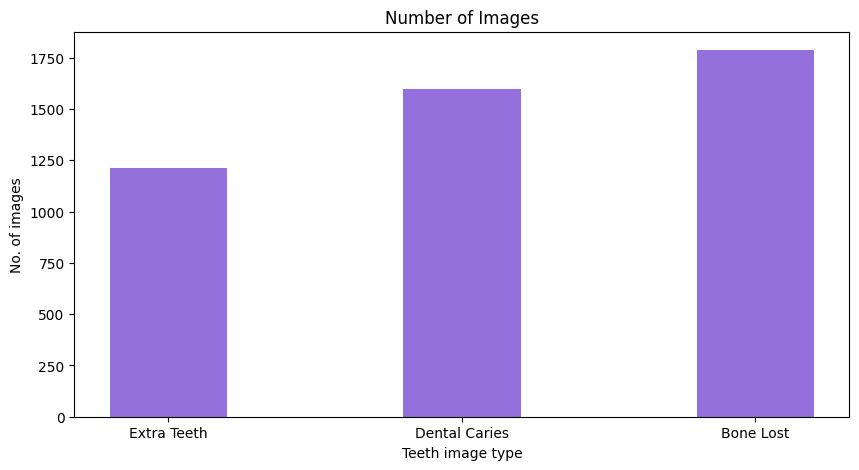

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = data_num
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='mediumpurple',
        width = 0.4)

plt.xlabel("Teeth image type")
plt.ylabel("No. of images")
plt.title("Number of Images")
plt.show()

Pre-Processing

In [ ]:


# import cv2
# from skimage.exposure import rescale_intensity
# from skimage.segmentation import slic
# from skimage.util import img_as_float
# from skimage import io
# import numpy as np



# #RESIZE
# def resize_image(image,w,h):
#     image=cv2.resize(image,(w,h))
#     cv2.imwrite(Folder_name+"/Resize-"+str(w)+"*"+str(h)+Extension, image)

# #crop
# def crop_image(image,y1,y2,x1,x2):
#     image=image[y1:y2,x1:x2]
#     cv2.imwrite(Folder_name+"/Crop-"+str(x1)+str(x2)+"*"+str(y1)+str(y2)+Extension, image)

# def padding_image(image,topBorder,bottomBorder,leftBorder,rightBorder,color_of_border=[0,0,0]):
#     image = cv2.copyMakeBorder(image,topBorder,bottomBorder,leftBorder,
#         rightBorder,cv2.BORDER_CONSTANT,value=color_of_border)
#     cv2.imwrite(Folder_name + "/padd-" + str(topBorder) + str(bottomBorder) + "*" + str(leftBorder) + str(rightBorder) + Extension, image)

# def flip_image(image,dir):
#     image = cv2.flip(image, dir)
#     cv2.imwrite(Folder_name + "/flip-" + str(dir)+Extension, image)

# def superpixel_image(image,segments):
#     seg=segments

#     def segment_colorfulness(image, mask):
#         # split the image into its respective RGB components, then mask
#         # each of the individual RGB channels so we can compute
#         # statistics only for the masked region
#         (B, G, R) = cv2.split(image.astype("float"))
#         R = np.ma.masked_array(R, mask=mask)
#         G = np.ma.masked_array(B, mask=mask)
#         B = np.ma.masked_array(B, mask=mask)

#         # compute rg = R - G
#         rg = np.absolute(R - G)

#         # compute yb = 0.5 * (R + G) - B
#         yb = np.absolute(0.5 * (R + G) - B)

#         # compute the mean and standard deviation of both `rg` and `yb`,
#         # then combine them
#         stdRoot = np.sqrt((rg.std() ** 2) + (yb.std() ** 2))
#         meanRoot = np.sqrt((rg.mean() ** 2) + (yb.mean() ** 2))

#         # derive the "colorfulness" metric and return it
#         return stdRoot + (0.3 * meanRoot)

#     orig = cv2.imread(image)
#     vis = np.zeros(orig.shape[:2], dtype="float")

#     # load the image and apply SLIC superpixel segmentation to it via
#     # scikit-image
#     image = io.imread(image)
#     segments = slic(img_as_float(image), n_segments=segments,
#                     slic_zero=True)
#     for v in np.unique(segments):
#         # construct a mask for the segment so we can compute image
#         # statistics for *only* the masked region
#         mask = np.ones(image.shape[:2])
#         mask[segments == v] = 0

#         # compute the superpixel colorfulness, then update the
#         # visualization array
#         C = segment_colorfulness(orig, mask)
#         vis[segments == v] = C
#     # scale the visualization image from an unrestricted floating point
#     # to unsigned 8-bit integer array so we can use it with OpenCV and
#     # display it to our screen
#     vis = rescale_intensity(vis, out_range=(0, 255)).astype("uint8")

#     # overlay the superpixel colorfulness visualization on the original
#     # image
#     alpha = 0.6
#     overlay = np.dstack([vis] * 3)
#     output = orig.copy()
#     cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)
#     # cv2.imshow("Visualization", vis)
#     cv2.imwrite(Folder_name + "/superpixels-" + str(seg) + Extension, output)

# def invert_image(image,channel):
#     # image=cv2.bitwise_not(image)
#     image=(channel-image)
#     cv2.imwrite(Folder_name + "/invert-"+str(channel)+Extension, image)

# def add_light(image, gamma=1.0):
#     invGamma = 1.0 / gamma
#     table = np.array([((i / 255.0) ** invGamma) * 255
#                       for i in np.arange(0, 256)]).astype("uint8")

#     image=cv2.LUT(image, table)
#     if gamma>=1:
#         cv2.imwrite(Folder_name + "/light-"+str(gamma)+Extension, image)
#     else:
#         cv2.imwrite(Folder_name + "/dark-" + str(gamma) + Extension, image)

# def add_light_color(image, color, gamma=1.0):
#     invGamma = 1.0 / gamma
#     image = (color - image)
#     table = np.array([((i / 255.0) ** invGamma) * 255
#                       for i in np.arange(0, 256)]).astype("uint8")

#     image=cv2.LUT(image, table)
#     if gamma>=1:
#         cv2.imwrite(Folder_name + "/light_color-"+str(gamma)+Extension, image)
#     else:
#         cv2.imwrite(Folder_name + "/dark_color" + str(gamma) + Extension, image)

# def saturation_image(image,saturation):
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#     v = image[:, :, 2]
#     v = np.where(v <= 255 - saturation, v + saturation, 255)
#     image[:, :, 2] = v

#     image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
#     cv2.imwrite(Folder_name + "/saturation-" + str(saturation) + Extension, image)

# def hue_image(image,saturation):
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#     v = image[:, :, 2]
#     v = np.where(v <= 255 + saturation, v - saturation, 255)
#     image[:, :, 2] = v

#     image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
#     cv2.imwrite(Folder_name +"/hue-" + str(saturation) + Extension, image)




In [ ]:
#Import different kinds of library
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.applications.mobilenet_v3 import mobilenet_v3, preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

In [ ]:
#Load the dataset
BATCH_SIZE = 16
IMAGE_SIZE = 299
CHANNELS=3
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/New Dataset',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 4598 files belonging to 3 classes.


In [ ]:
#Class name in my dataset
class_name=dataset.class_names
class_name


['Bone Lost', 'Dental Caries', 'Extra Teeth']

In [ ]:
#image shape
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(16, 299, 299, 3)
[2 1 1 1 0 2 1 2 0 1 0 1 1 1 1 2]


In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[120.       116.       113.      ]
  [120.42475  116.42475  113.42475 ]
  [121.37458  117.37458  114.37458 ]
  ...
  [122.93472  118.93472  115.93472 ]
  [116.76083  112.76083  109.76083 ]
  [114.       110.       107.      ]]

 [[120.28428  116.28428  113.28428 ]
  [120.76941  116.76941  113.76941 ]
  [121.85425  117.85425  114.85425 ]
  ...
  [124.3913   120.3913   117.3913  ]
  [117.40736  113.40736  110.40736 ]
  [114.28428  110.28428  107.28428 ]]

 [[121.140465 117.140465 114.140465]
  [121.80743  117.80743  114.80743 ]
  [123.29888  119.29888  116.29888 ]
  ...
  [128.77817  124.77816  121.77816 ]
  [119.35452  115.35452  112.35452 ]
  [115.140465 111.140465 108.140465]]

 ...

 [[ 49.140472  50.140472  45.140472]
  [ 48.16987   49.16987   44.16987 ]
  [ 45.99939   46.99939   41.99939 ]
  ...
  [ 44.134983  45.134983  40.134983]
  [ 42.16861   43.16861   38.16861 ]
  [ 41.28929   42.28929   37.28929 ]]

 [[ 48.284286  49.284286  44.284286]
  [ 47.4046    48.4046    43.4046  ]


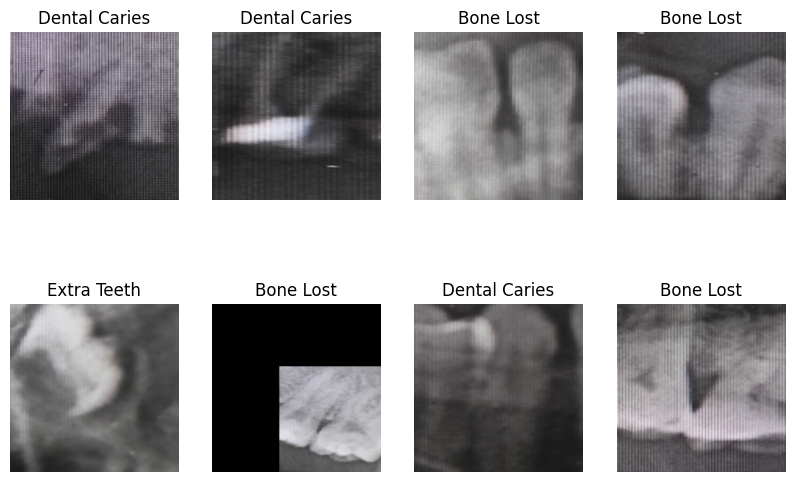

In [ ]:
#some data visualization for understanding
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(2):
  for i in range(8):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_name[labels_batch[i]])
    plt.axis("off")

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.7, val_split=0.2, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

##inception v3

In [ ]:
#InceptionV3 model
conv_base = InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape = (299,299,3))


for layer in conv_base.layers:
    layer.trainable = False


x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
# x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [ ]:
#Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20
)

Epoch 1/20
201/201 [==============================] - 32s 110ms/step - loss: 8.4618 - accuracy: 0.5346 - val_loss: 6.9063 - val_accuracy: 0.5833
Epoch 2/20
201/201 [==============================] - 15s 77ms/step - loss: 2.4779 - accuracy: 0.6148 - val_loss: 1.0778 - val_accuracy: 0.6996
Epoch 3/20
201/201 [==============================] - 16s 77ms/step - loss: 1.0125 - accuracy: 0.6800 - val_loss: 1.1116 - val_accuracy: 0.6765
Epoch 4/20
201/201 [==============================] - 16s 78ms/step - loss: 0.7762 - accuracy: 0.7155 - val_loss: 0.7644 - val_accuracy: 0.6732
Epoch 5/20
201/201 [==============================] - 16s 78ms/step - loss: 0.6401 - accuracy: 0.7414 - val_loss: 0.5533 - val_accuracy: 0.7686
Epoch 6/20
201/201 [==============================] - 16s 79ms/step - loss: 0.6609 - accuracy: 0.7314 - val_loss: 0.8883 - val_accuracy: 0.6776
Epoch 7/20
201/201 [==============================] - 16s 79ms/step - loss: 0.5975 - accuracy: 0.7498 - val_loss: 0.5587 - val_accuracy

In [ ]:
#Testing the model
scores = model.evaluate(test_ds)

30/30 [==============================] - 7s 63ms/step - loss: 0.4781 - accuracy: 0.8000


first image to predict
actual label: Extra Teeth
1/1 [==============================] - 1s 1s/step
predicted label: Extra Teeth


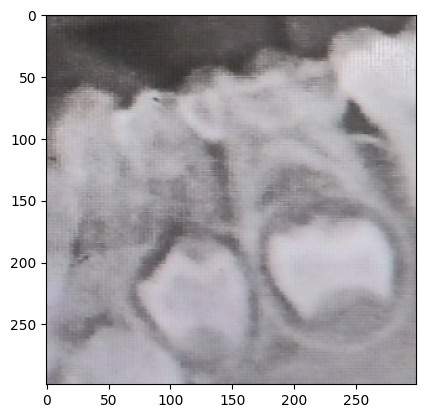

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[5].numpy().astype('uint8')
    first_label = labels_batch[5].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[5])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 25ms/step


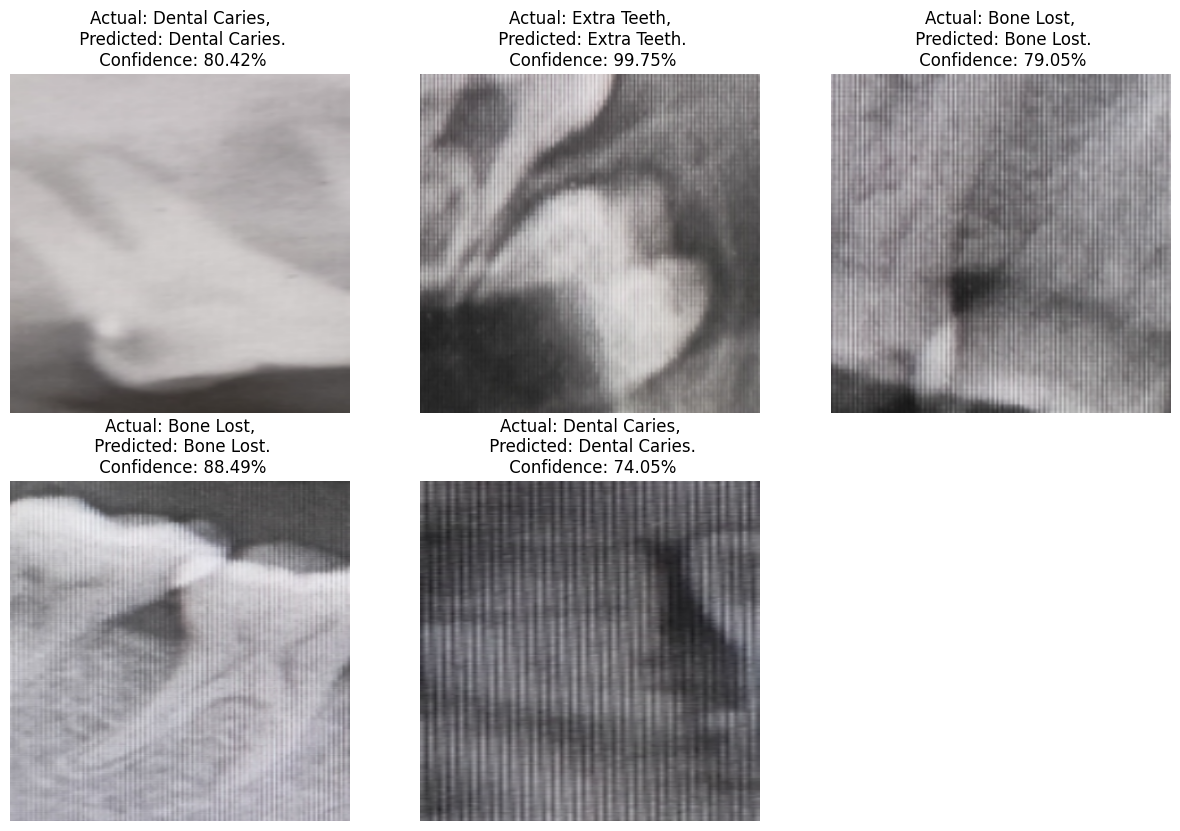

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(2):
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence =predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

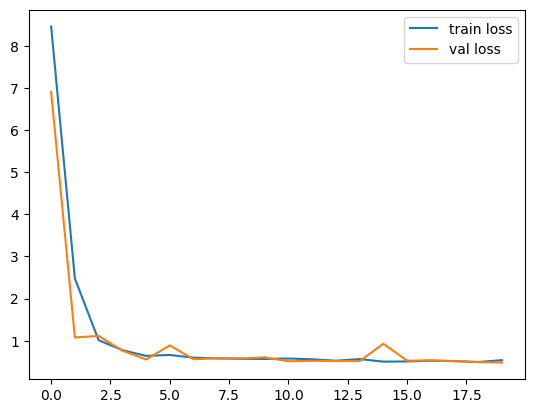

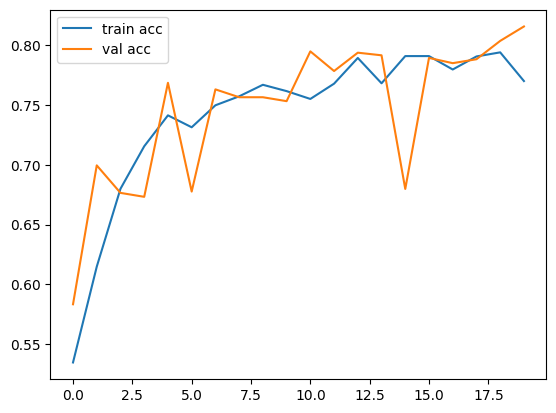

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
predicted = []
actual = []
for images, labels in test_ds:
  for i in range(5):
    predicted_class, confidence =predict(model, images[i].numpy())
    predicted.append(predicted_class)
    actual.append(class_name[labels[i]])
    print(predicted_class,class_name[labels[i]])

1/1 [==============================] - 0s 24ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 23ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 24ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 23ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 23ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 23ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 23ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 22ms/step
Bone Lost Bone Lost
1/1 [==============================] - 0s 23ms/step
Dental Caries Extra Teeth
1/1 [==============================] - 0s 24ms/step
Dental Caries Bone Lost
1/1 [==============================] - 0s 24ms/step
Bone Lost Bone Lost
1/1 [==============================] - 0s 26ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 26ms/step
Extra Teeth Extra Teet

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(actual, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.87719298 0.72222222 0.79487179]
recall: [0.80645161 0.79591837 0.79487179]
fscore: [0.84033613 0.75728155 0.79487179]


In [ ]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

con_matrix = confusion_matrix(actual, predicted)
con_matrix

array([[50,  9,  3],
       [ 5, 39,  5],
       [ 2,  6, 31]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:.2}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:.2%}; misclass={:.2%}'.format(accuracy, misclass))
    plt.show()

# Example usage:
# Assuming cm is your confusion matrix and target_names is a list of class labels
# plot_confusion_matrix(cm, target_names)


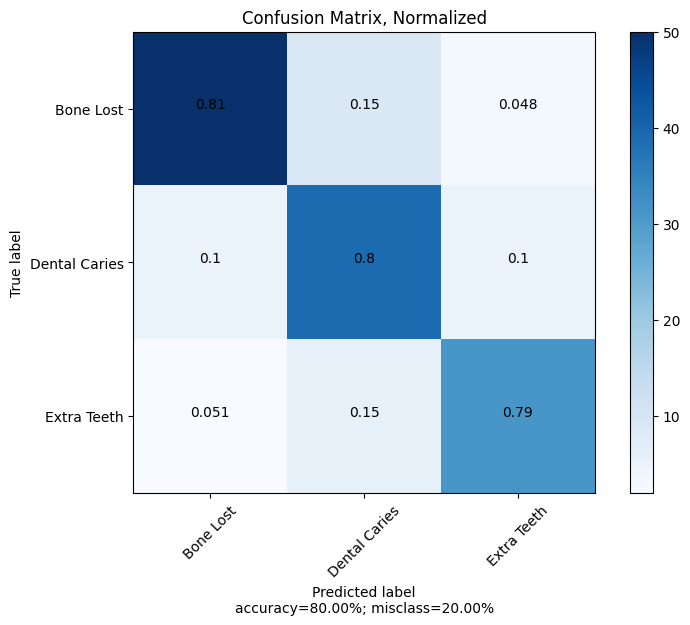

In [ ]:
plot_confusion_matrix(cm           = con_matrix,
                      normalize    = True,
                      target_names = class_name,
                      title        = "Confusion Matrix, Normalized")

##MobileNet v3

In [ ]:
#MobileNet model
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
conv_base = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape = (299,299,3))


for layer in conv_base.layers:
    layer.trainable = False


x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
#Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20
)

Epoch 1/20
100/100 [==============================] - 15s 107ms/step - loss: 0.9961 - accuracy: 0.5492 - val_loss: 0.8249 - val_accuracy: 0.5837
Epoch 2/20
100/100 [==============================] - 9s 88ms/step - loss: 0.8151 - accuracy: 0.6260 - val_loss: 0.7352 - val_accuracy: 0.6875
Epoch 3/20
100/100 [==============================] - 9s 88ms/step - loss: 0.7604 - accuracy: 0.6602 - val_loss: 0.8130 - val_accuracy: 0.6094
Epoch 4/20
100/100 [==============================] - 9s 88ms/step - loss: 0.7364 - accuracy: 0.6712 - val_loss: 0.7208 - val_accuracy: 0.6708
Epoch 5/20
100/100 [==============================] - 9s 88ms/step - loss: 0.6729 - accuracy: 0.6987 - val_loss: 0.6387 - val_accuracy: 0.7388
Epoch 6/20
100/100 [==============================] - 9s 88ms/step - loss: 0.6634 - accuracy: 0.7075 - val_loss: 0.6766 - val_accuracy: 0.7065
Epoch 7/20
100/100 [==============================] - 9s 88ms/step - loss: 0.6207 - accuracy: 0.7348 - val_loss: 0.6983 - val_accuracy: 0.67

In [ ]:
#Testing the model
scores = model.evaluate(test_ds)

16/16 [==============================] - 1s 72ms/step - loss: 0.4267 - accuracy: 0.8223


first image to predict
actual label: Dental Caries
1/1 [==============================] - 1s 722ms/step
predicted label: Dental Caries


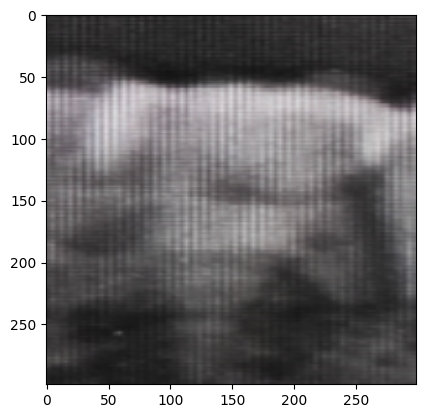

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[5].numpy().astype('uint8')
    first_label = labels_batch[5].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[5])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 20ms/step


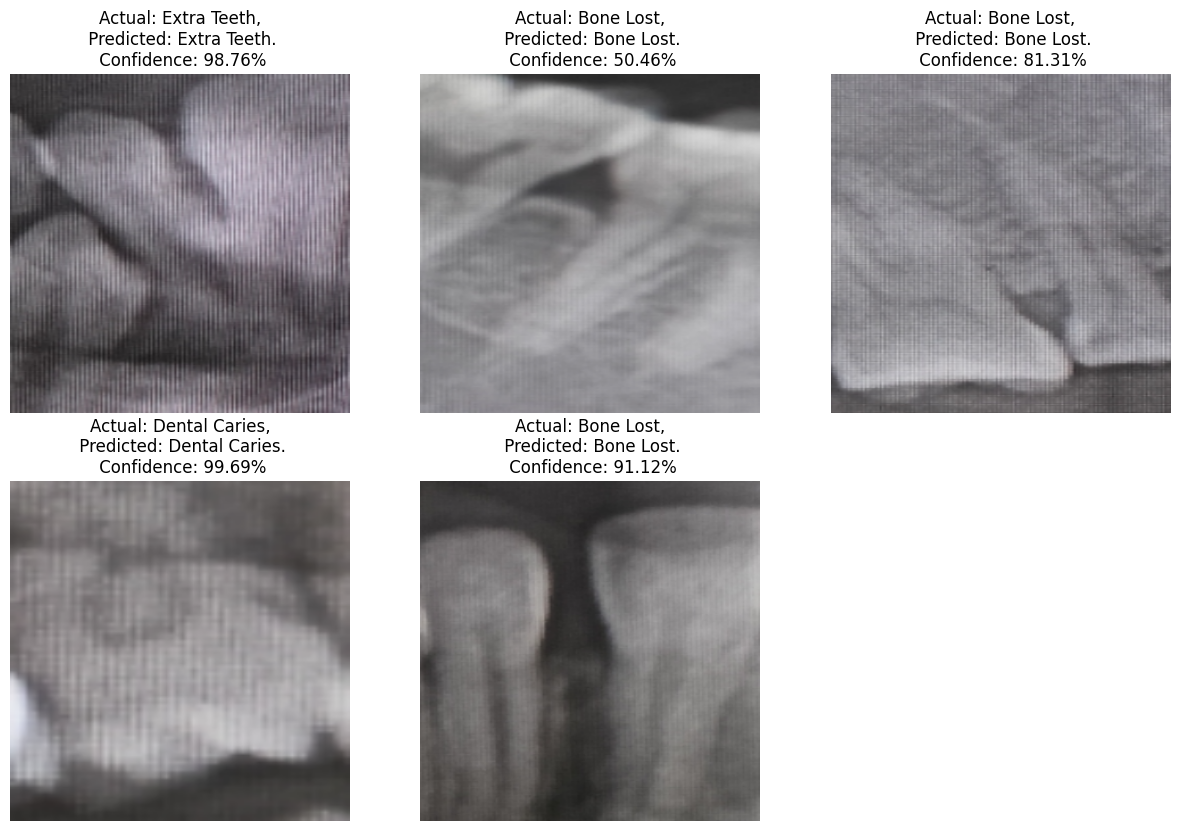

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(2):
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence =predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

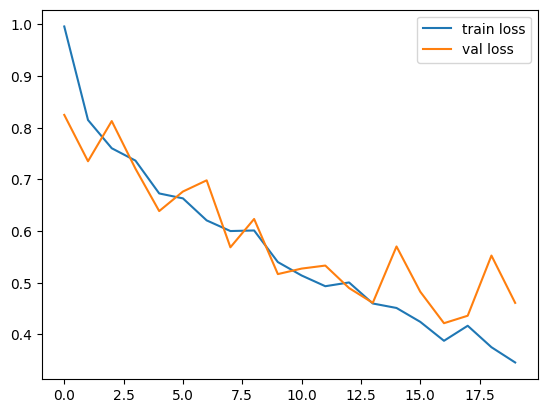

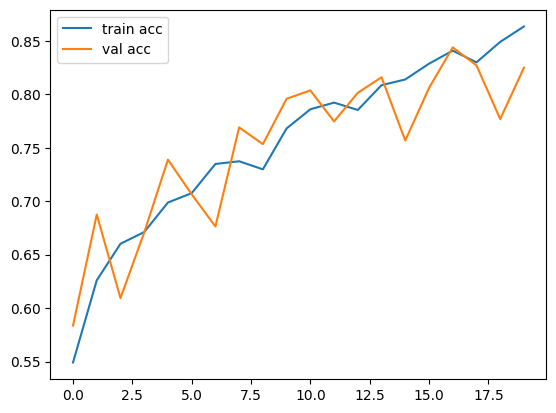

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
predicted = []
actual = []
for images, labels in test_ds:
  for i in range(5):
    predicted_class, confidence =predict(model, images[i].numpy())
    predicted.append(predicted_class)
    actual.append(class_name[labels[i]])
    print(predicted_class,class_name[labels[i]])

1/1 [==============================] - 0s 21ms/step
Bone Lost Bone Lost
1/1 [==============================] - 0s 21ms/step
Bone Lost Bone Lost
1/1 [==============================] - 0s 20ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 20ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 20ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 24ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 22ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 22ms/step
Bone Lost Bone Lost
1/1 [==============================] - 0s 20ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 21ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 20ms/step
Bone Lost Bone Lost
1/1 [==============================] - 0s 22ms/step
Bone Lost Bone Lost
1/1 [==============================] - 0s 21ms/step
Dental Caries Dental Caries
1/1 [=======

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(actual, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.91304348 0.90322581 0.76923077]
recall: [0.75       0.90322581 0.95238095]
fscore: [0.82352941 0.90322581 0.85106383]


In [ ]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

con_matrix = confusion_matrix(actual, predicted)
con_matrix

array([[21,  2,  5],
       [ 2, 28,  1],
       [ 0,  1, 20]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:.2}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:.2%}; misclass={:.2%}'.format(accuracy, misclass))
    plt.show()

# Example usage:
# Assuming cm is your confusion matrix and target_names is a list of class labels
# plot_confusion_matrix(cm, target_names)


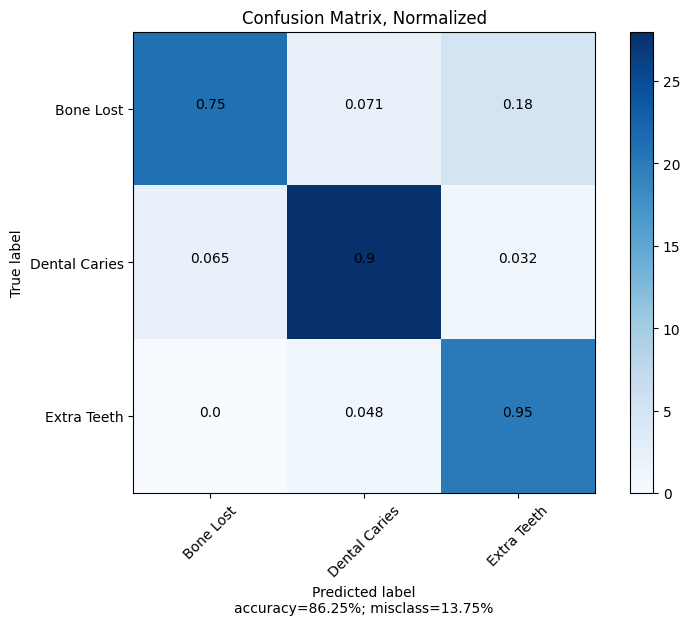

In [ ]:
plot_confusion_matrix(cm           = con_matrix,
                      normalize    = True,
                      target_names = class_name,
                      title        = "Confusion Matrix, Normalized")

##custom model only 3 layer cnn


In [ ]:
conv_base = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', input_shape=(299, 299, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten()
])

x = conv_base.output
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [ ]:
#Train the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20
)

Epoch 1/20
201/201 [==============================] - 5s 17ms/step - loss: 1.2611 - accuracy: 0.4114 - val_loss: 1.0705 - val_accuracy: 0.3366
Epoch 2/20
201/201 [==============================] - 3s 14ms/step - loss: 1.0273 - accuracy: 0.4950 - val_loss: 1.0010 - val_accuracy: 0.5351
Epoch 3/20
201/201 [==============================] - 3s 14ms/step - loss: 0.8738 - accuracy: 0.6017 - val_loss: 0.8553 - val_accuracy: 0.5559
Epoch 4/20
201/201 [==============================] - 3s 14ms/step - loss: 0.7398 - accuracy: 0.6806 - val_loss: 0.7589 - val_accuracy: 0.6414
Epoch 5/20
201/201 [==============================] - 3s 14ms/step - loss: 0.6634 - accuracy: 0.7296 - val_loss: 0.6943 - val_accuracy: 0.7346
Epoch 6/20
201/201 [==============================] - 3s 14ms/step - loss: 0.6024 - accuracy: 0.7642 - val_loss: 0.5456 - val_accuracy: 0.7840
Epoch 7/20
201/201 [==============================] - 3s 14ms/step - loss: 0.5701 - accuracy: 0.7633 - val_loss: 0.4894 - val_accuracy: 0.8103

In [ ]:
#Testing the model
scores = model.evaluate(test_ds)

30/30 [==============================] - 0s 8ms/step - loss: 0.3511 - accuracy: 0.8583


first image to predict
actual label: Dental Caries
1/1 [==============================] - 0s 90ms/step
predicted label: Dental Caries


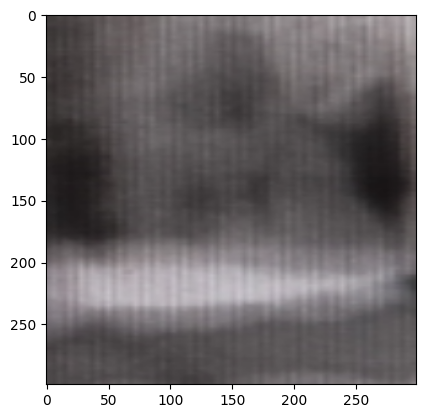

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 17ms/step


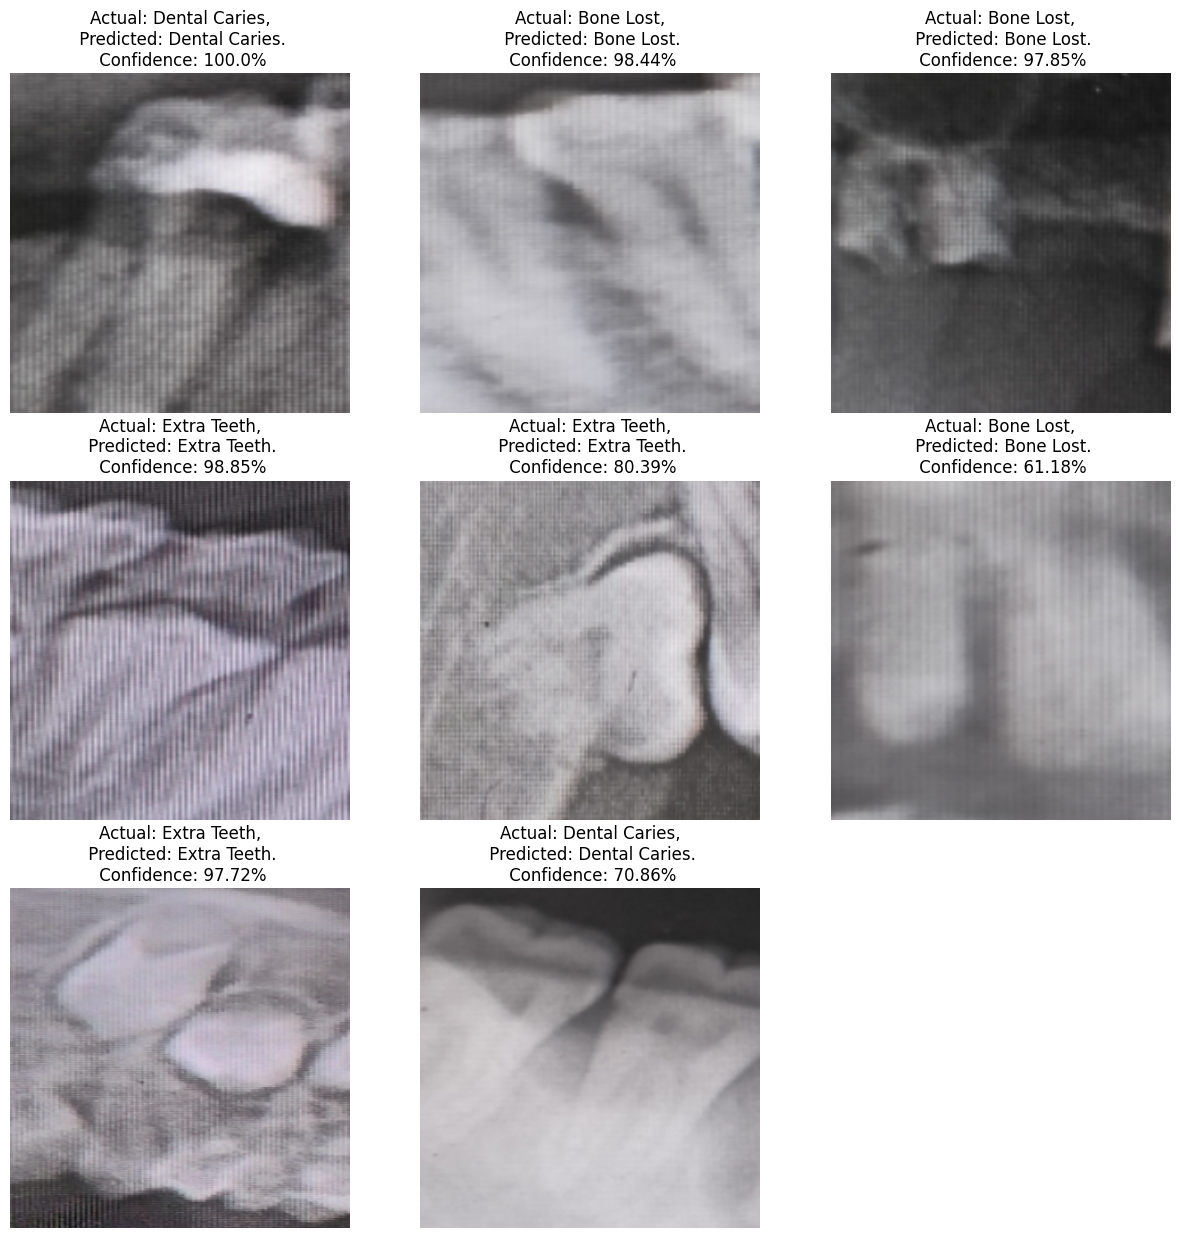

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence =predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

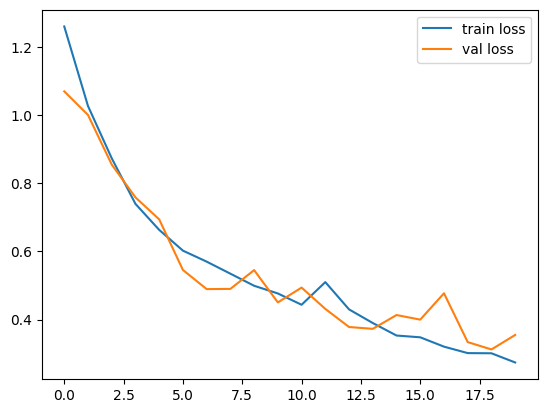

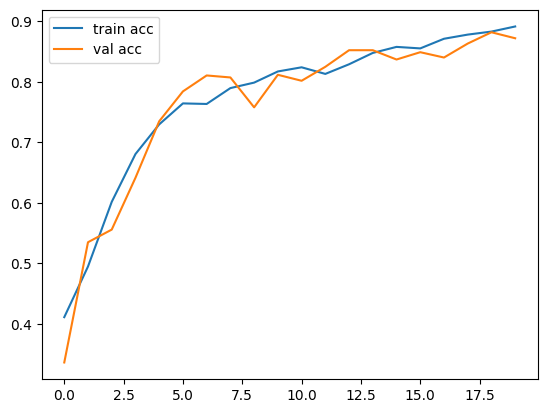

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
predicted = []
actual = []
for images, labels in test_ds:
  for i in range(8):
    predicted_class, confidence =predict(model, images[i].numpy())
    predicted.append(predicted_class)
    actual.append(class_name[labels[i]])
    print(predicted_class,class_name[labels[i]])

1/1 [==============================] - 0s 18ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 18ms/step
Extra Teeth Extra Teeth
1/1 [==============================] - 0s 17ms/step
Extra Teeth Dental Caries
1/1 [==============================] - 0s 17ms/step
Bone Lost Bone Lost
1/1 [==============================] - 0s 19ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 17ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 17ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 18ms/step
Bone Lost Bone Lost
1/1 [==============================] - 0s 17ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 17ms/step
Bone Lost Bone Lost
1/1 [==============================] - 0s 16ms/step
Dental Caries Dental Caries
1/1 [==============================] - 0s 19ms/step
Bone Lost Bone Lost
1/1 [==============================] - 0s 17ms/step
Bone Lost Bone Lost
1/1 [=====

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(actual, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.86363636 0.86666667 0.88311688]
recall: [0.9047619  0.79268293 0.91891892]
fscore: [0.88372093 0.82802548 0.90066225]


In [ ]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

con_matrix = confusion_matrix(actual, predicted)
con_matrix

array([[76,  4,  4],
       [12, 65,  5],
       [ 0,  6, 68]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:.2}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:.2%}; misclass={:.2%}'.format(accuracy, misclass))
    plt.show()

# Example usage:
# Assuming cm is your confusion matrix and target_names is a list of class labels
# plot_confusion_matrix(cm, target_names)


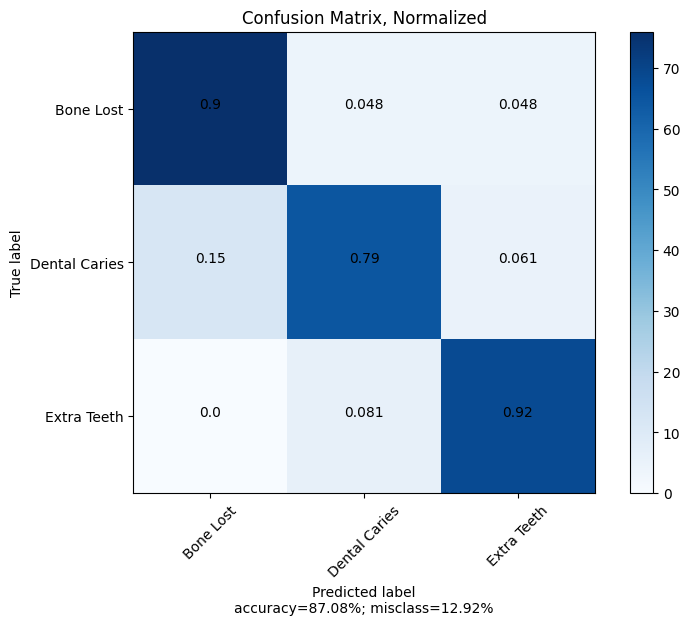

In [ ]:
plot_confusion_matrix(cm           = con_matrix,
                      normalize    = True,
                      target_names = class_name,
                      title        = "Confusion Matrix, Normalized")